# Song Popularity Prediction Analysis

### Problem Domain: Applying Data Science and Machine Learning Models in Music Industry.
### Datasets: Analysis will be done based on two datasets: "tracks" and "artists" downloaded from Kaggle.

#### Research Questions:
1. What are the key factors that predict a song's popularity on Spotify?
2. How do different acoustic features of a song (like danceability, energy, key, and loudness) correlate with its popularity?
3. Does the popularity of an artist influence the popularity of their songs?
4. Are there any temporary trends in song popularity?
   
#### Objectives:
1. Understand the structure and quality of the data. Clean and preprocess the datasets for analysis.
2. Create new features that help predict song popularity, such as extracting the year from the release date.
3. Apply various machine learning models to predict song popularity.
4. Evaluate the performance of different machine learning models and compare the results.
5. Identify the most important features influencing song popularity.

### Preparation (Data collection, importing necessary libraries)

In [1]:
# Importing dependencies / libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Checking the correct path to files

import os

file_path = './dataset/tracks.csv'
if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist.")

The file './dataset/tracks.csv' exists.


### Data Preprocessing

In [3]:
# Define functions → Load data → Explore data → Clean data → Merge data.

In [4]:
# Function Definition for reading files

def read_file(filename):    
    return pd.read_csv(filename, na_values=['?','NA'])

In [5]:
# Loading the dataset

df_tracks = pd.read_csv('./dataset/tracks.csv')
df_artists = pd.read_csv('./dataset/artists.csv')

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#

### Exploring data

In [6]:
# Checking the shape of the files

print("Shape of Tracks",df_tracks.shape)
print("Shape of Artists",df_artists.shape)

Shape of Tracks (586672, 20)
Shape of Artists (1162095, 5)


In [7]:
# Displaying basic information about the tracks_df DataFrame

df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [8]:
# Displaying basic information about the artists_df DataFrame

df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162092 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [9]:
# Displaying the first ten rows of the tracks_df DataFrame

df_tracks.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [10]:
# Displaying the first ten rows of the tracks_df DataFrame

df_artists.head(10)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
5,0DotfDlYMGqkbzfBhcA5r6,7.0,[],Astral Affect,0
6,0DqP3bOCiC48L8SM9gK4W8,1.0,[],Yung Seed,0
7,0Drs3maQb99iRglyTuxizI,0.0,[],Wi'Ma,0
8,0DsPeAi1gxPPnYjgpiEGSR,0.0,[],lentboy,0
9,0DtvnTxgZ9K5YaPS5jdlQW,20.0,[],addworks,0


In [11]:
# Generating summary statistics for tracks dataset

df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [12]:
# Generating summary statistics for artists dataset

df_artists.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [13]:
# Checking for missing values in the original tracks dataset 

print(df_tracks.isna().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [14]:
# Displaying count (sum) of missing values in original artists dataset

print(df_artists.isna().sum())

id             0
followers     11
genres         0
name           3
popularity     0
dtype: int64


In [15]:
# CHANGE tracks data in Tracks DF

for i in range(len(df_tracks)):
# 1- Remove the square brackets and single quotes from the column from tracks->id_artists
# >>> Remove [' ... ']
    df_tracks["id_artists"].values[i] = df_tracks["id_artists"].values[i][2:-2]
    
# 2- change release_date values to release year
# >>> values can be '08/12/2023' or '2023/12' or '2023'
    release_date_array = df_tracks["release_date"].values[i].split('-')
    length = len(release_date_array)
    if length > 0: 
        df_tracks["release_date"].values[i] = int( release_date_array[0] )
    else:
        df_tracks["release_date"].values[i] = np.nan

# Change year to numeric format to data analysis    
df_tracks.dropna(subset = ['release_date'], inplace=True)
df_tracks["release_date"] = pd.to_numeric(df_tracks["release_date"])


In [16]:
# Checking for missing values in the original tracks dataset 

print(df_tracks.isna().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [17]:
# 1- We won't need genres it does not have any value and artist's name
df_artists.drop(['genres','name'], axis = 1, inplace = True)

# 2- Before merging with Tracks DF change column names to join 
# >> Change 'id' and 'popularity' column name in Artists DF
df_artists.rename(columns = {'id': 'id_artists','popularity': 'artists_popularity'}, inplace = True)
    
    

In [18]:
# Merge Datasets
merged_df = df_tracks.merge(df_artists, on = 'id_artists')


In [19]:
# Displaying basic information about the merged DataFrame

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470038 entries, 0 to 470037
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  470038 non-null  object 
 1   name                470038 non-null  object 
 2   popularity          470038 non-null  int64  
 3   duration_ms         470038 non-null  int64  
 4   explicit            470038 non-null  int64  
 5   artists             470038 non-null  object 
 6   id_artists          470038 non-null  object 
 7   release_date        470038 non-null  int64  
 8   danceability        470038 non-null  float64
 9   energy              470038 non-null  float64
 10  key                 470038 non-null  int64  
 11  loudness            470038 non-null  float64
 12  mode                470038 non-null  int64  
 13  speechiness         470038 non-null  float64
 14  acousticness        470038 non-null  float64
 15  instrumentalness    470038 non-nul

In [20]:
# Displaying first 10 Rows of the merged DataFrame

merged_df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artists_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922,0.645,0.44500,...,1,0.4510,0.674,0.744,0.1510,0.127,104.851,3,91.0,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922,0.298,0.46000,...,1,0.4530,0.521,0.856,0.4360,0.402,87.921,4,91.0,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922,0.634,0.00399,...,0,0.0377,0.926,0.919,0.1050,0.396,79.895,4,91.0,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922,0.657,0.32500,...,0,0.2540,0.199,0.856,0.0931,0.105,81.944,5,91.0,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922,0.644,0.68400,...,1,0.1990,0.144,0.802,0.0847,0.138,100.031,4,91.0,4
5,6MD9XSLD4VmVI5SFRPm6By,Car Loans,0,172803,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922,0.651,0.57400,...,0,0.1040,0.474,0.713,0.0597,0.412,99.878,4,91.0,4
6,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922,0.695,0.26300,...,1,0.9570,0.797,0.000,0.1480,0.655,102.009,1,3.0,0
7,0OYGe21oScKJfanLyM7daU,Capítulo 2.8 - Banquero Anarquista,0,99100,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922,0.676,0.23500,...,0,0.9600,0.794,0.000,0.2100,0.724,96.777,3,3.0,0
8,0PE42H6tslQuyMMiGRiqtb,Capítulo 2.25 - Banquero Anarquista,0,132700,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922,0.750,0.22900,...,1,0.9550,0.578,0.000,0.3140,0.531,102.629,3,3.0,0
9,0cC9CYjLRIzwchQ42xVnq6,Capítulo 1.23 - Banquero Anarquista,0,96600,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922,0.687,0.19800,...,0,0.9620,0.754,0.000,0.1970,0.478,78.453,1,3.0,0


In [21]:
# Summary Statistics for merged DataFrame
merged_df.describe()

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artists_popularity
count,470038.000000,4.700380e+05,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,470038.000000,4.700380e+05,470038.000000
mean,28.392524,2.267375e+05,0.034987,1988.854688,0.565913,0.555447,5.223099,-9.883890,0.664434,0.100757,0.429147,0.093756,0.213999,0.564334,119.226204,3.879657,1.064992e+06,50.310469
std,17.494863,1.147592e+05,0.183746,21.278759,0.159077,0.244112,3.520338,4.618667,0.472189,0.178089,0.339304,0.241880,0.185237,0.252629,29.704765,0.456678,3.851286e+06,19.688863
min,0.000000,3.344000e+03,0.000000,1900.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,15.000000,1.756470e+05,0.000000,1976.000000,0.460000,0.367000,2.000000,-12.489000,0.000000,0.033200,0.088800,0.000000,0.098000,0.361000,96.361000,4.000000,1.295900e+04,38.000000
50%,28.000000,2.147870e+05,0.000000,1992.000000,0.577000,0.560000,5.000000,-9.137000,1.000000,0.042800,0.394000,0.000019,0.139000,0.576000,118.041000,4.000000,9.399400e+04,52.000000
75%,41.000000,2.615162e+05,0.000000,2006.000000,0.682000,0.755000,8.000000,-6.471000,1.000000,0.071300,0.746000,0.005120,0.278000,0.778000,137.293500,4.000000,5.953350e+05,65.000000
max,99.000000,5.621218e+06,1.000000,2021.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.969000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,7.890023e+07,100.000000


In [22]:
# Checking if cleaning the merged DataFrame was successful

merged_df.isna().sum()

id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
artists_popularity    0
dtype: int64

### Exploratory Data Analysis (EDA)

In [23]:
# Select only numeric columns for analysis
numeric_tracks_df = merged_df.select_dtypes(include=["int", "float"])

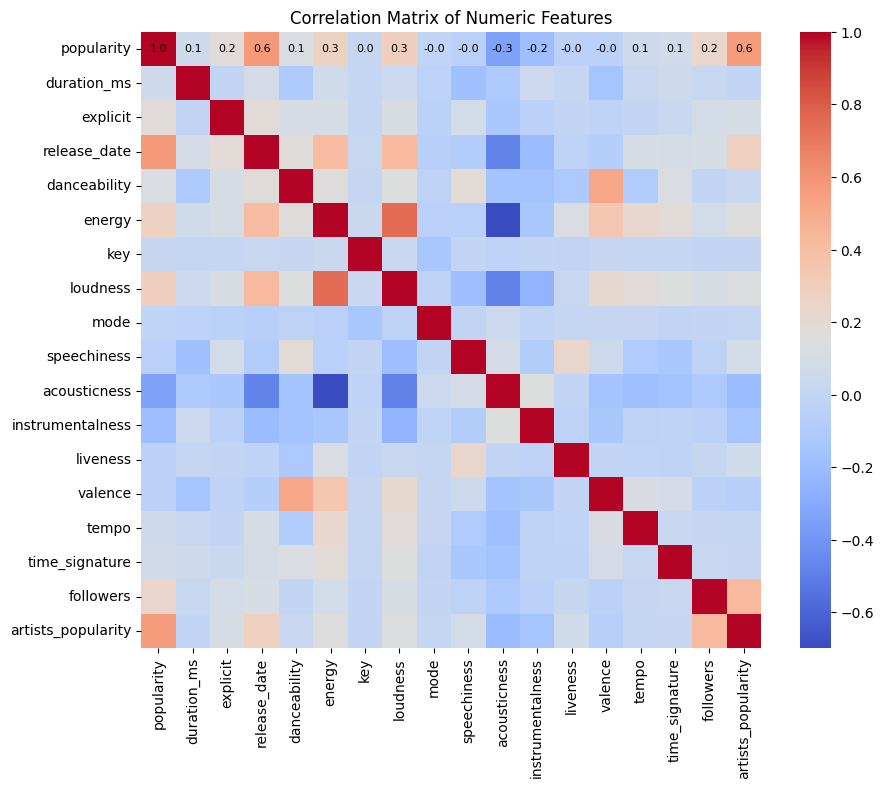

In [24]:
# Creating and display Correlation Matrix with Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_tracks_df.corr(), annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"fontsize":8, "color":"black"})
plt.title("Correlation Matrix of Numeric Features")
plt.show()


<Figure size 4000x800 with 0 Axes>

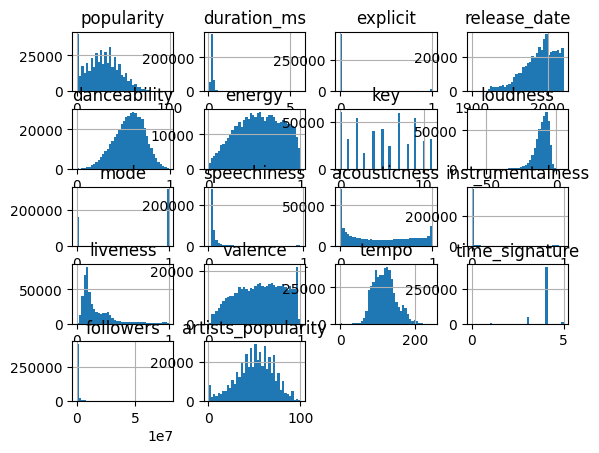

In [25]:
# Displaying Histogram of Features
plt.figure(figsize=(40, 8))
merged_df.hist(bins=40)
plt.show()

/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


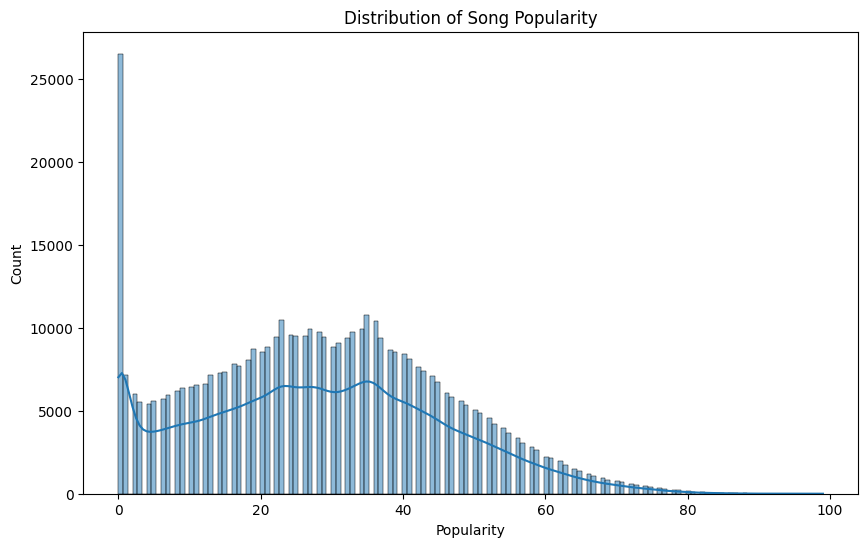

In [26]:
# Displaying Histogram of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['popularity'], kde=True)
plt.xlabel("Popularity")
plt.title('Distribution of Song Popularity')
plt.show()


In [27]:
# Let's convert popularity always positive
merged_df['popularity'] = merged_df['popularity'] + 1


/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


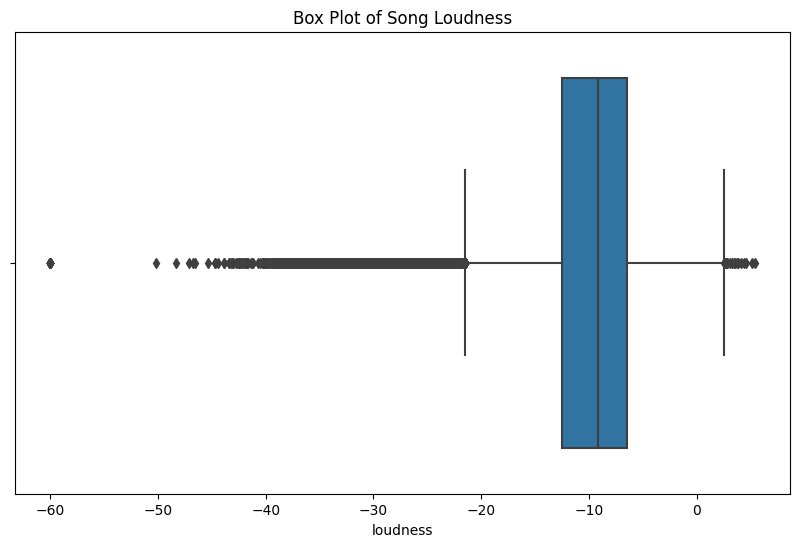

In [28]:
# Displaying Boxplot of Loudness
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['loudness'])
plt.title('Box Plot of Song Loudness')
plt.show()

In [29]:
# Audio features over release date analysis
Release_date = merged_df.groupby('release_date')[['danceability', 'energy', 'valence']].mean()
# Plot Release date analysis using a bar plot
plt.figure()
plt.figure(figsize=(50, 8))  # Increase the figure size for a larger plot
release_date_analysis.plot(kind='bar', stacked=True)
plt.title("Release Date Analysis - Average Audio Features")
plt.xlabel("Release Date")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.legend(title="Audio Features Over Time")


NameError: name 'release_date_analysis' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 5000x800 with 0 Axes>

/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 640x480 with 0 Axes>

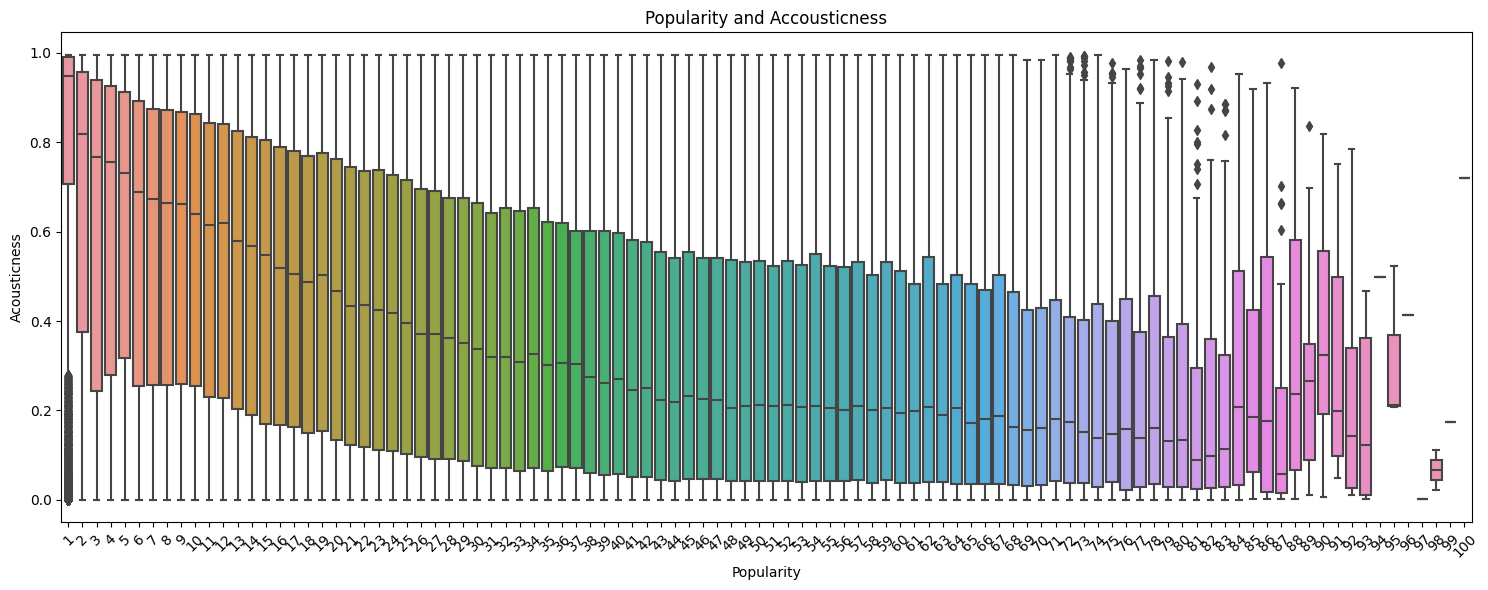

In [30]:
# Popularity vs Acousticness
plt.figure()
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=merged_df, x='popularity', y='acousticness')
plt.title("Popularity and Accousticness")
plt.xlabel("Popularity")
plt.ylabel("Acousticness")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing

/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 640x480 with 0 Axes>

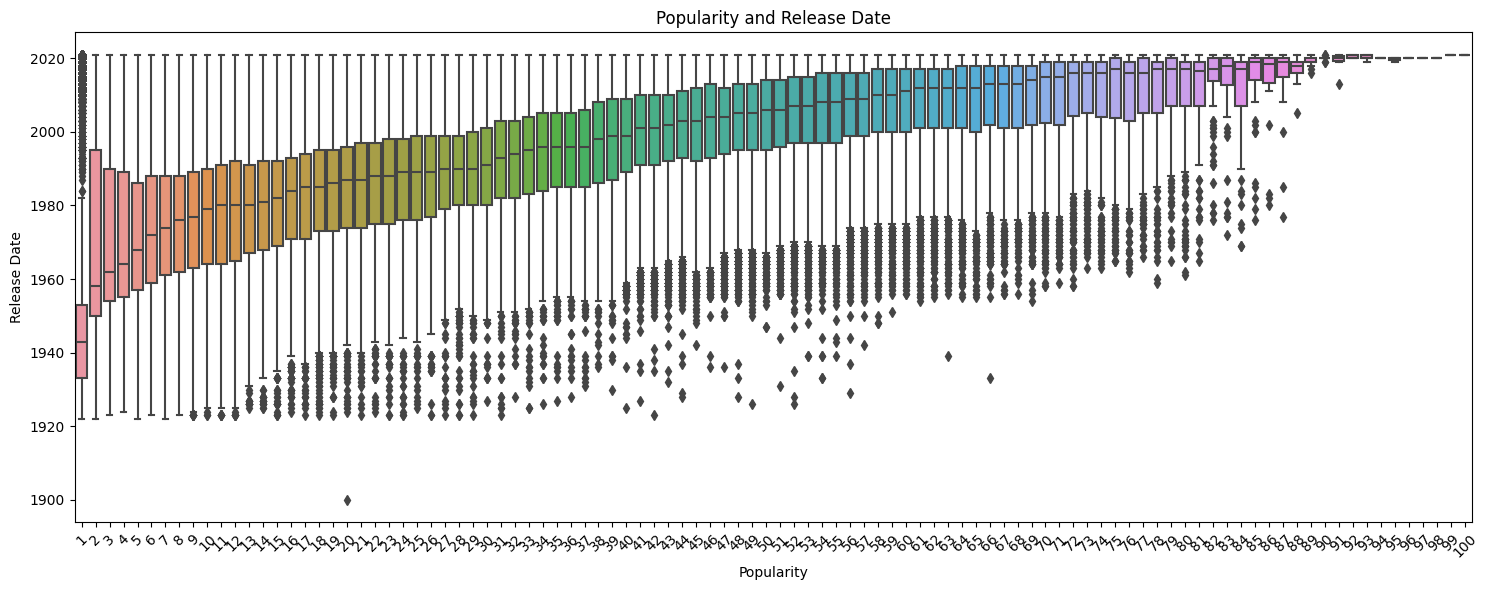

In [31]:
# Popularity vs Release Date
plt.figure()
plt.figure(figsize=(15, 6))
sns.boxplot(data=merged_df, x='popularity', y='release_date')
plt.title("Popularity and Release Date")
plt.xlabel("Popularity")
plt.ylabel("Release Date")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing

Text(0, 0.5, 'Mean Value')

<Figure size 640x480 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

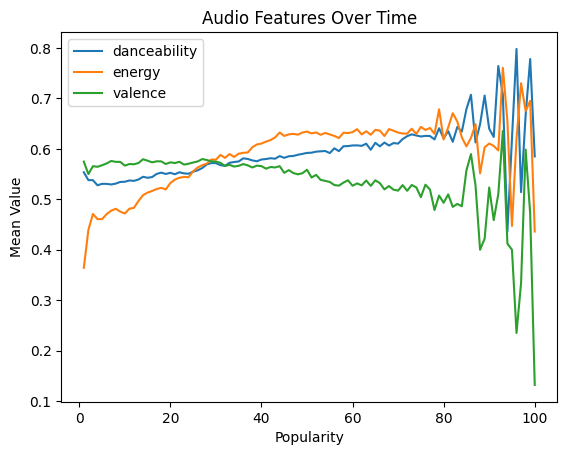

In [32]:
# Audio Features Over Time
plt.figure()
plt.figure(figsize=(15, 6))
attributes_over_time = merged_df.groupby('popularity')[['danceability', 'energy', 'valence']].mean()
attributes_over_time.plot()
plt.title("Audio Features Over Time")
plt.xlabel("Popularity")
plt.ylabel("Mean Value")

/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/berrinulus/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


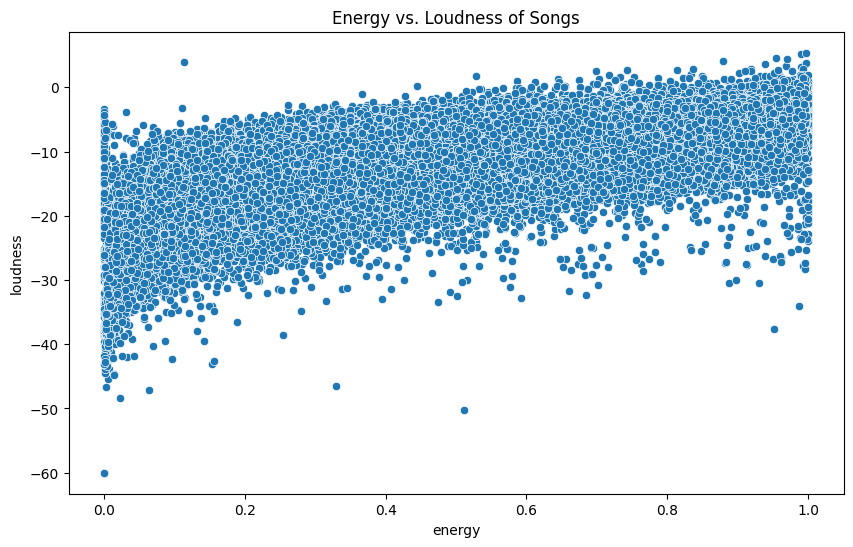

In [33]:
# Scatter Plot of Energy vs. Loudness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='loudness', data=merged_df)
plt.title('Energy vs. Loudness of Songs')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

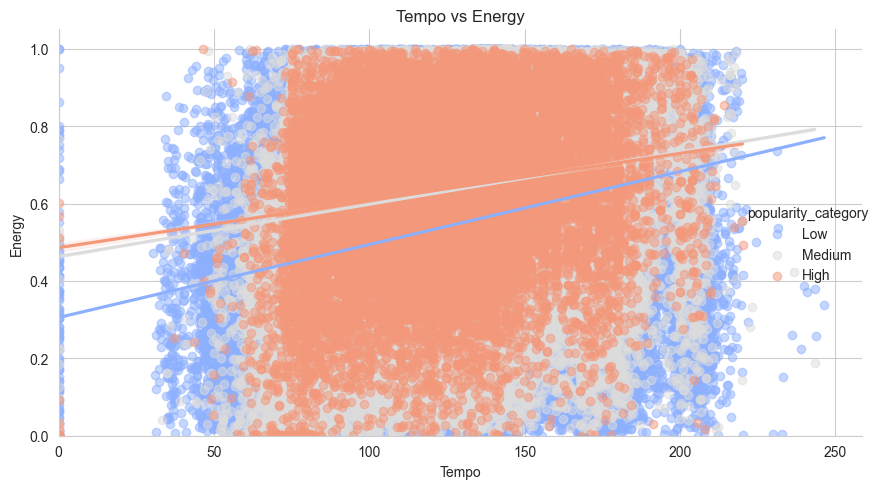

In [39]:
# Tempo vs Energy with Popularity Categories
# Create discrete color categories based on popularity
df_category = merged_df
df_category['popularity_category'] = pd.cut(df_category['popularity'], bins=[0, 40, 60, 100], labels=['Low', 'Medium', 'High'])

plt.figure()
plt.figure(figsize=(10, 6))  # Set the figure size
# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("coolwarm")  
scatterplot = sns.lmplot(data=df_category, x='tempo', y='energy', hue='popularity_category', palette='coolwarm', scatter_kws={'alpha':0.5}, aspect=1.5)
plt.title("Tempo vs Energy")
plt.xlabel("Tempo")
plt.ylabel("Energy")
# Adjust plot limits for better clarity
scatterplot.set(xlim=(0, df_category['tempo'].max()*1.05), ylim=(0, 1.05))
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Initial release date: 2021
Recent release date: 1900
Mean of release date: 1988.8546883443466


/var/folders/5r/wd8n38lj7k3d7grkznk9kq5h0000gn/T/ipykernel_16758/3072822856.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  release_date = merged_df.groupby('year_cat')[['danceability', 'energy', 'valence']].mean()


<Figure size 640x480 with 0 Axes>

<Figure size 5000x800 with 0 Axes>

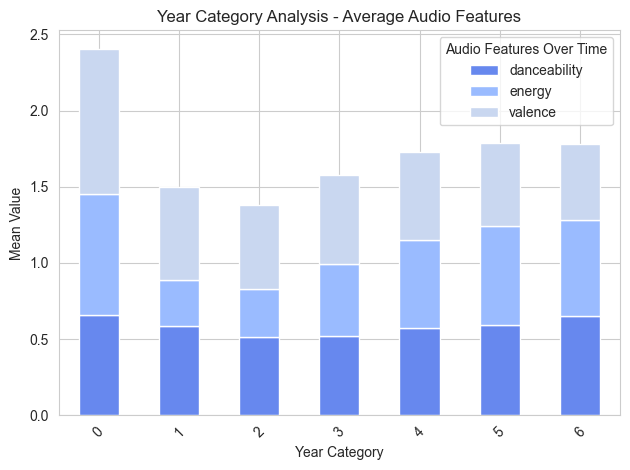

In [38]:
# Change release date to categorical value
print('Initial release date:', merged_df['release_date'].max())
print('Recent release date:', merged_df['release_date'].min())
print('Mean of release date:', merged_df['release_date'].mean())

# Define bins and labels for year categorisation
bins = [0, 1920, 1940, 1960, 1980, 2000, 2020, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6]

# Categorise release dates
merged_df['year_cat'] = pd.cut(merged_df['release_date'], bins=bins, labels=labels, right=False)


# release_date over audio features
release_date = merged_df.groupby('year_cat')[['danceability', 'energy', 'valence']].mean()

# Plot Relase date analysis using a bar plot
plt.figure()
plt.figure(figsize=(50, 8))  # Increase the figure size for a larger plot
release_date.plot(kind='bar', stacked=True)
plt.title("Year Category Analysis - Average Audio Features")
plt.xlabel("Year Category")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.legend(title="Audio Features Over Time")
plt.show()

In [36]:
# Normalise selected columns
def normalise(df_min_max_scaled, columns):
    for column in columns:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
    
    return df_min_max_scaled

# Checking values for normalisation
df_statistics = merged_df.describe().T
print("Statistics before normalization")
print(df_statistics)
print("\n")

# Transforming duration and folowers 
columns = ["duration_ms", "followers"]
merged_df = normalise(merged_df, columns )


print("Statistics after normalization")
df_statistics = merged_df.describe().T
print(df_statistics)

Statistics before normalization
                       count          mean           std     min          25%  \
popularity          470038.0  2.939252e+01  1.749486e+01     1.0      16.0000   
duration_ms         470038.0  2.267375e+05  1.147592e+05  3344.0  175647.0000   
explicit            470038.0  3.498653e-02  1.837459e-01     0.0       0.0000   
release_date        470038.0  1.988855e+03  2.127876e+01  1900.0    1976.0000   
danceability        470038.0  5.659129e-01  1.590775e-01     0.0       0.4600   
energy              470038.0  5.554472e-01  2.441120e-01     0.0       0.3670   
key                 470038.0  5.223099e+00  3.520338e+00     0.0       2.0000   
loudness            470038.0 -9.883890e+00  4.618667e+00   -60.0     -12.4890   
mode                470038.0  6.644335e-01  4.721886e-01     0.0       0.0000   
speechiness         470038.0  1.007574e-01  1.780890e-01     0.0       0.0332   
acousticness        470038.0  4.291473e-01  3.393038e-01     0.0       0.0888

### Feature Selection

In [40]:
# Selecting relevant features - 'popularity' is the target variable


# Let's drop some features since they don't have correlation with popularity
# Release_date is categorized in year_cat column

merged_df=merged_df.select_dtypes(include=["int","float"])
merged_df.drop(["release_date",'explicit',"key","mode","speechiness", 'liveness', 'valence',"time_signature"], axis=1, inplace=True)


# Prepare X and y
target_column = 'popularity'
feature_columns = []
for column in merged_df.columns:
    if column != target_column:
        feature_columns.append(column)
   
print("feature columns are:",feature_columns)

#Define X and y        
X = merged_df[feature_columns].values
y = merged_df[target_column].values



feature columns are: ['duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo', 'followers', 'artists_popularity']


### Data Splitting

In [41]:
#perform a single split, with 25% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10) 
print("Train dataset size: ", len(X_train))
print("Test dataset size: ", len(X_test))


Train dataset size:  352528
Test dataset size:  117510


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
     

StandardScaler()

In [43]:
#and plot the values to emphasise the noise
def chart_regression(y_pred, y_test, title, sort=True ):
    df_compare = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test.flatten()})
    if sort:
        df_compare.sort_values(by=['y_test'], inplace=True)
    plt.figure()
    plt.plot(df_compare['y_test'].tolist(), label='Actual')
    plt.plot(df_compare['y_pred'].tolist(), label='Prediction')
    plt.ylabel('Output')
    plt.xticks(rotation=45)  
    plt.legend(title=title)
    plt.show()
    
def calculate_error(y_test,y_pred, title):
    
    rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
    r2score_rf = r2_score(y_test, y_pred)
    print('Mean:', np.mean(y_test))
    print(f'Root Mean Square Error: {round(rmse_rf,4)}')
    print(f'R2 Score: {round(r2score_rf,4)}')
    
    df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_head = df_compare.head(25)
    
    plt.figure()
    df_head.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
    plt.legend(title=title)
    plt.show()


def plot_graphs(y_test, y_pred, title):
    calculate_error(y_test,y_pred, title)
    print('Correlation for',title, ':', stats.pearsonr(y_test,y_pred))
    chart_regression(y_pred[0:50],y_test[0:50], title)


### Random Forest Model Training

In [ ]:
def random_forest(X_train, X_test, y_train):
        
    print("_____________________________________")
    print("Model: Random Forest Regression")
    model_rf = RandomForestRegressor(random_state = 42)
    
    
    print("Training model...")
    model_rf.fit(X_train,y_train)
    
    
    print("Predicting test values")
    y_pred = model_rf.predict(X_test)
    
    return y_pred

# Random Forest Model Prediction
model_title = "Random Forest Model"
y_pred = random_forest(X_train, X_test, y_train)

_____________________________________
Model: Random Forest Regression
Training model...


### Random Forest Model Evaluation

In [ ]:
plot_graphs(y_test, y_pred, title = model_title )

### Hyperparameter Tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = [2, 3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 300, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

y_pred = rf_random.predict(X_test)

plot_graphs(y_test, y_pred, title = "Random Forest with Hyperparameters" )

### Linear Regression Model Training

In [484]:
def linear_regression(X_train, X_test, y_train):
    print("_____________________________________")
    print("Model: Linear Regression")
    model_lr = LinearRegression(fit_intercept=True)

    print("Training model...")
    model_lr.fit(X_train, y_train)

    print("Predicting test values")
    y_pred = model_lr.predict(X_test)
    
    return y_pred


# Linear Regression Model Prediction
model_title = "Linear Regression Model"
y_pred = linear_regression(X_train, X_test, y_train)


_____________________________________
Model: Linear Regression
Training model...
Predicting test values


### Linear Regression Model Evaluation

Mean: 29.363569057952514
Root Mean Square Error: 13.4956
R2 Score: 0.4035


<Figure size 640x480 with 0 Axes>

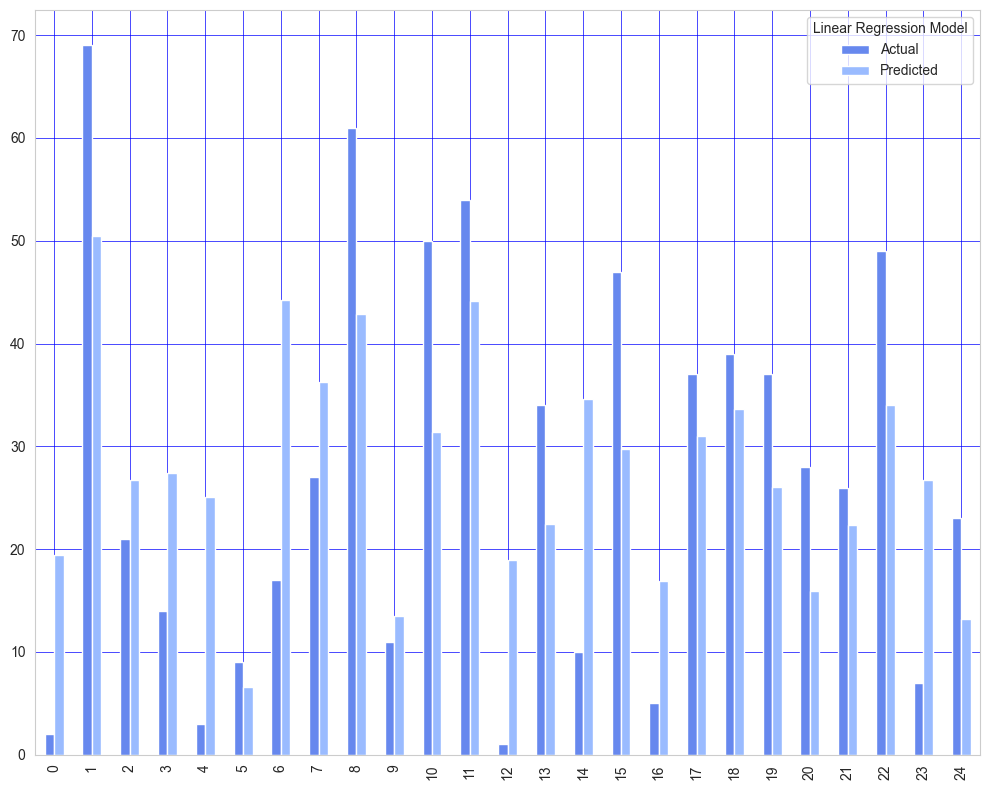

Correlation for Linear Regression Model : PearsonRResult(statistic=0.6352119072277669, pvalue=0.0)


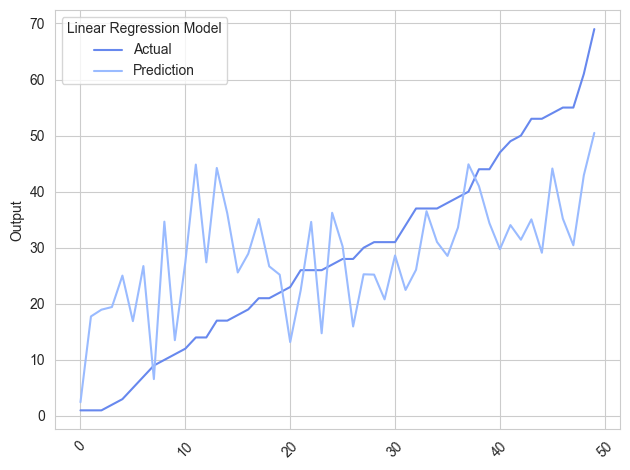

In [485]:
plot_graphs(y_test, y_pred, title = model_title)

### Decision Tree Regression Model Training

In [487]:
def decision_tree(X_train, X_test, y_train):
    
    print("_____________________________________")
    print("Model: Decision Tree Regression")
    model_dt = DecisionTreeRegressor(random_state = 0)
    
    print("Training model...")
    model_dt.fit(X_train,y_train)

    print("Predicting test values")
    y_pred = model_dt.predict(X_test)
    
    return y_pred

# Decision Tree Model Prediction
model_title = "Decision Tree Model"
y_pred = decision_tree(X_train, X_test, y_train)

_____________________________________
Model: Decision Tree Regression
Training model...
Predicting test values


### Decision Tree Regression Model Evaluation

Mean: 29.363569057952514
Root Mean Square Error: 16.2073
R2 Score: 0.1397


<Figure size 640x480 with 0 Axes>

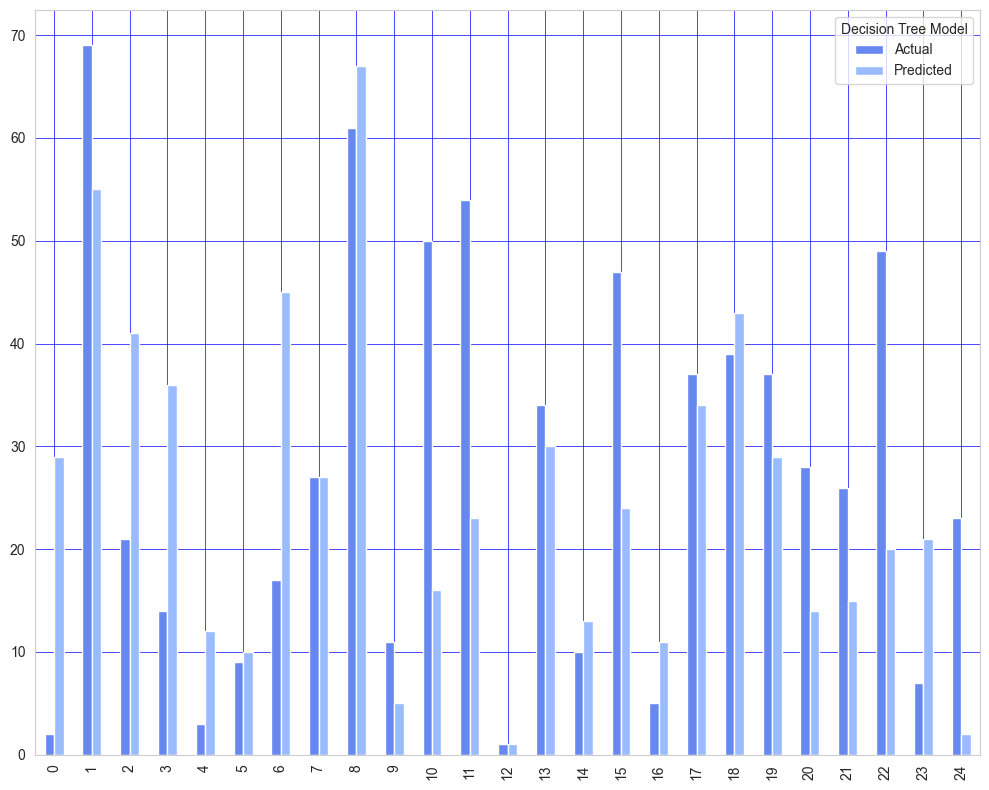

Correlation for Decision Tree Model : PearsonRResult(statistic=0.5739505641847894, pvalue=0.0)


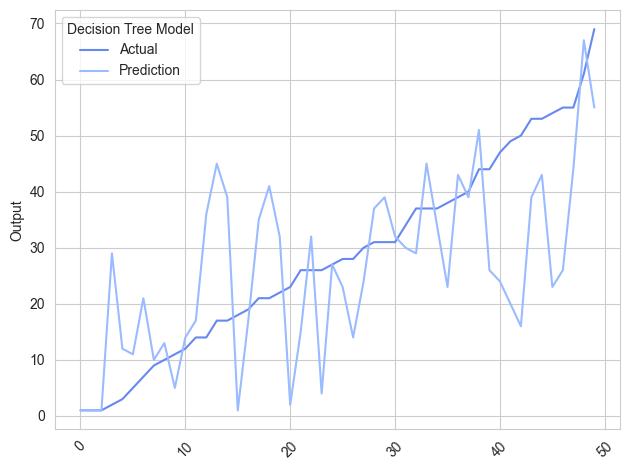

In [488]:
plot_graphs(y_test, y_pred, title = model_title)

### Support Vector Model Training

In [ ]:
def support_vector(X_train, X_test, y_train, Penalty=1000, epsilon=1):
    print("_____________________________________")
    print("Model: Support Vector Regression")
    
    model_svr = SVR(C=Penalty, epsilon=epsilon)

    print("Training model...")
    model_svr.fit(X_train,y_train)

    print("Predicting test values")
    y_pred = model_svr.predict(X_test)
    
    return y_pred

# Support Vector Regression Model
model_title = "Support Vector Regression Model"
y_pred = support_vector(X_train, X_test, y_train)


_____________________________________
Model: Support Vector Regression
Training model...


In [ ]:
plot_graphs(y_test, y_pred, title = model_title)